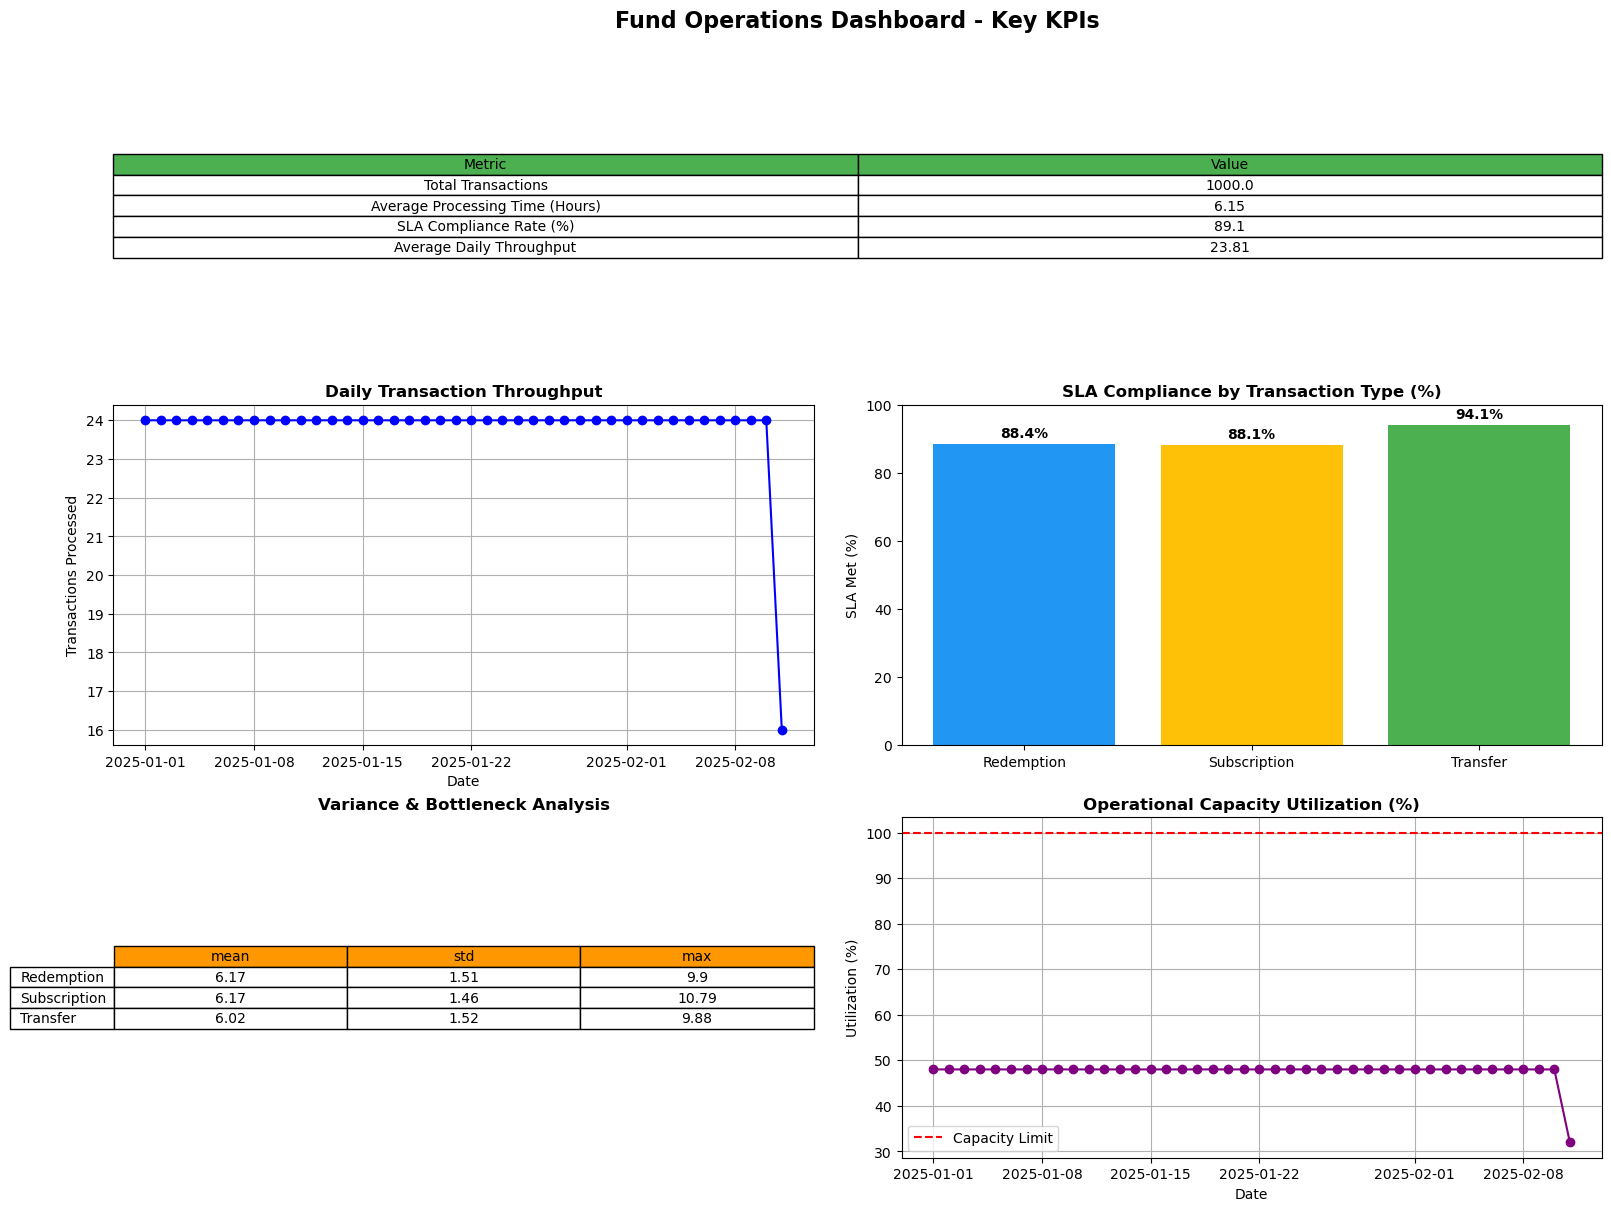

In [6]:
# Fund Operations Dashboard - One-Cell Program
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# -----------------------------
# Setup
# -----------------------------
np.random.seed(42)
plt.rcParams["figure.figsize"] = (12, 6)

# -----------------------------
# Simulate Fund Operations Data
# -----------------------------
n = 1000

data = pd.DataFrame({
    "Transaction ID": range(1, n + 1),
    "Transaction Type": np.random.choice(
        ["Subscription", "Redemption", "Transfer"],
        size=n,
        p=[0.5, 0.35, 0.15]
    ),
    "Processing Time (Hours)": np.random.normal(6, 1.5, n).clip(1),
    "SLA (Hours)": 8,
    "Processing Timestamp": pd.date_range(
        start="2025-01-01",
        periods=n,
        freq="h"
    )
})

data["SLA Met"] = data["Processing Time (Hours)"] <= data["SLA (Hours)"]

# -----------------------------
# KPIs
# -----------------------------
total_tx = len(data)
avg_time = data["Processing Time (Hours)"].mean()
sla_rate = data["SLA Met"].mean() * 100
daily_throughput = data.groupby(data["Processing Timestamp"].dt.date).size().mean()

kpi_df = pd.DataFrame({
    "Metric": ["Total Transactions", "Average Processing Time (Hours)", "SLA Compliance Rate (%)", "Average Daily Throughput"],
    "Value": [total_tx, round(avg_time,2), round(sla_rate,2), round(daily_throughput,2)]
})

# -----------------------------
# Prepare Dashboard Layout
# -----------------------------
fig = plt.figure(constrained_layout=True, figsize=(16, 12))
gs = GridSpec(3, 2, figure=fig)

# KPI Table
ax0 = fig.add_subplot(gs[0, :])
ax0.axis("off")
ax0.table(cellText=kpi_df.values, colLabels=kpi_df.columns, loc='center', cellLoc='center', colColours=["#4CAF50"]*2)
ax0.set_title("Fund Operations Dashboard - Key KPIs", fontweight='bold', fontsize=16)

# Daily Throughput Line Chart
ax1 = fig.add_subplot(gs[1, 0])
daily_tx = data.groupby(data["Processing Timestamp"].dt.date).size()
ax1.plot(daily_tx.index, daily_tx.values, marker='o', color='blue')
ax1.set_title("Daily Transaction Throughput", fontweight='bold')
ax1.set_xlabel("Date")
ax1.set_ylabel("Transactions Processed")
ax1.grid(True)

# SLA Compliance Bar Chart
ax2 = fig.add_subplot(gs[1, 1])
sla_by_type = data.groupby("Transaction Type")["SLA Met"].mean().mul(100)
ax2.bar(sla_by_type.index, sla_by_type.values, color=['#2196F3','#FFC107','#4CAF50'])
ax2.set_title("SLA Compliance by Transaction Type (%)", fontweight='bold')
ax2.set_ylabel("SLA Met (%)")
ax2.set_ylim(0, 100)
for i, v in enumerate(sla_by_type.values):
    ax2.text(i, v + 2, f"{v:.1f}%", ha='center', fontweight='bold')

# Variance & Bottleneck Table
ax3 = fig.add_subplot(gs[2, 0])
variance_df = data.groupby("Transaction Type")["Processing Time (Hours)"].agg(["mean","std","max"]).round(2)
ax3.axis("off")
ax3.table(cellText=variance_df.values, rowLabels=variance_df.index, colLabels=variance_df.columns, loc='center', cellLoc='center', colColours=["#FF9800"]*3)
ax3.set_title("Variance & Bottleneck Analysis", fontweight='bold')

# Capacity Utilization Chart
ax4 = fig.add_subplot(gs[2, 1])
capacity_per_day = 50
capacity_utilization = daily_tx / capacity_per_day * 100
ax4.plot(capacity_utilization.index, capacity_utilization.values, marker='o', color='purple')
ax4.axhline(100, linestyle='--', color='red', label='Capacity Limit')
ax4.set_title("Operational Capacity Utilization (%)", fontweight='bold')
ax4.set_ylabel("Utilization (%)")
ax4.set_xlabel("Date")
ax4.legend()
ax4.grid(True)

plt.show()
